In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
img_array = cv2.imread("Test dataset/closed eyes/s0037_00089_1_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

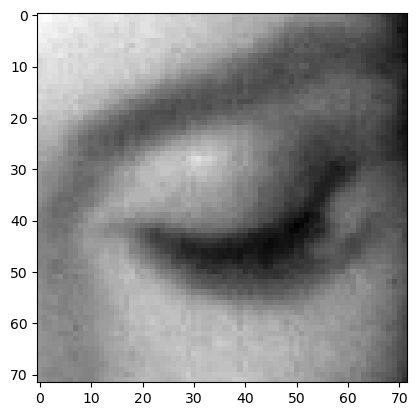

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(72, 72)

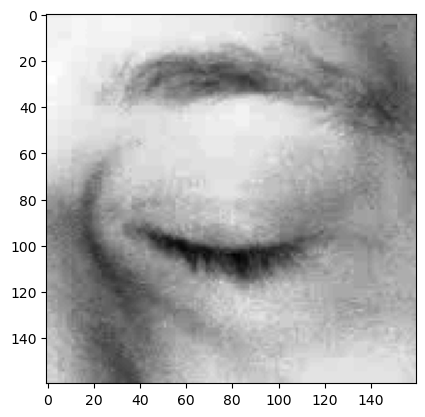

In [5]:
Datadirectory = "Test dataset/"
Classes = ["closed eyes", "open eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

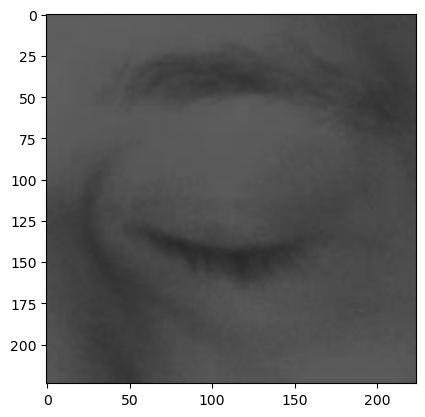

In [6]:
img_size = 224

new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

## reading all the images and converting them into array



In [7]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except EXCEPTION as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

4299


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(4299, 224, 224, 3)

In [13]:
#normalize the data
X = X.astype('float16')  # Convert the data to float32
X = X / 255.0


In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle" , "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle" , "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [17]:
#deep learning model for training

from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

## Transfer learning


In [20]:
base_input = model.layers[0].input  

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:

X = X.astype('float16')
new_model.fit(X,Y, epochs = 1,validation_split= 0.1)

 31/121 [======>.......................] - ETA: 4:05 - loss: 0.1577 - accuracy: 0.9425

In [27]:
new_model.save('my_model.h5')

C:\Users\salon\downloads\Project\env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## checking the prediction

In [28]:
img_array = cv2.imread('s0035_00623_0_1_1_0_1_02.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [29]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [30]:
X_input.shape

(1, 224, 224, 3)

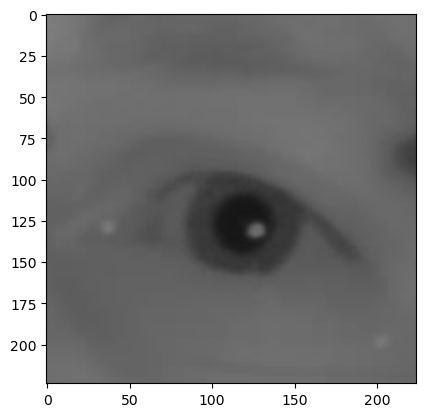

In [31]:
plt.imshow(new_array)

In [32]:
X_input = X_input/255.0

In [33]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 302ms/step


In [34]:
prediction

array([[1.]], dtype=float32)

## Checking

In [35]:
img = cv2.imread('test.png')

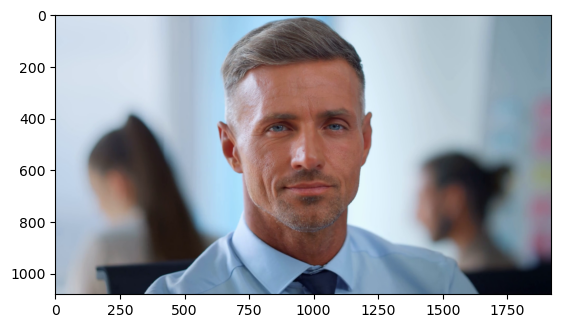

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [41]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255,0), 2)

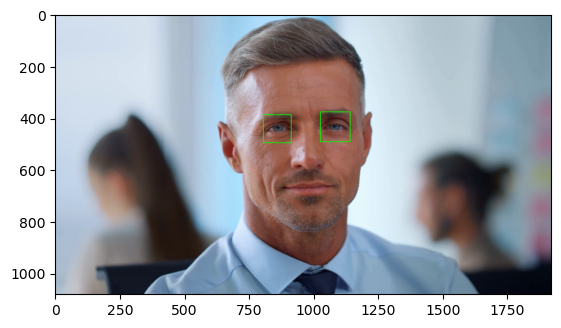

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## CROPPING THE EYES IMAGE

In [43]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
        
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

eyes are not detected


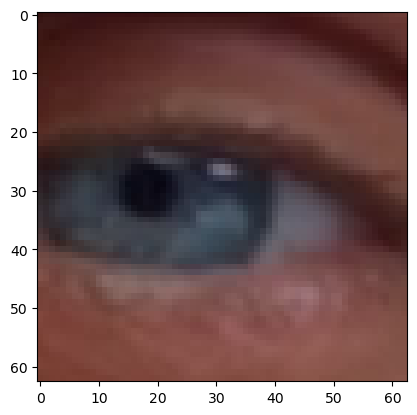

In [44]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [45]:
eyes_roi.shape

(63, 63, 3)

In [46]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [47]:
final_image.shape

(1, 224, 224, 3)

In [48]:
new_model.predict(final_image)

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)

## Realtime Video

In [49]:
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError ("Cannot open webcam")
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
        
        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image, axis = 0)
        final_image = final_image/255.0
        
        Prediction = new_model.predict(final_image)
        if (Prediction>0):
            status = "Open Eyes"
            
        else:
            status = "Closed Eyes"
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray,1.1,4)
        
        for(x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.putText(frame,
                    status,
                   (50,50),
                   font, 3,
                   (0,0,255),
                   2,
                   cv2.LINE_4)
        cv2.imshow("Drowsiness Detection",frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
            
            

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError ("Cannot open webcam")
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
        
        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image, axis = 0)
        final_image = final_image/255.0
        
        Prediction = new_model.predict(final_image)
        if (Prediction>0):
            status = "Open Eyes"
            
        else:
            status = "Closed Eyes"
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray,1.1,4)
        
        for(x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.putText(frame,
                    status,
                   (50,50),
                   font, 3,
                   (0,0,255),
                   2,
                   cv2.LINE_4)
        cv2.imshow("Drowsiness Detection",frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
            
            